### SVM ACC



In [ ]:
from util import fisherztrans,stat_m_e,pair_test,sig,color_inv_alpha
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from faceprf_figure_function import set_figure,set_ax,myviolinplot_ind,myviolinplot_pair
import pingouin

cms=np.array([[255, 195, 73],[145, 115, 185]])/255 

nsubj = 8
npos = 16
task = ['Digit Task','Face Task']
roi_labels = ['V1','V2','V3','hV4','IOG','pFus','mFus']
nroi = len(roi_labels)
ntask = len(task)
# distance: near vs. far
num_nf=[[0,4],[5,9]]
nf = ['Near','Far']
# roi: early visual cortex (V1-V3) - face-selective region
num_vf=[[0,3],[4,7]]
vf = ['V1-V3','OFA,FFA-1,FFA-2']
nsample2 = nsubj * np.max(np.diff(num_nf)) * np.max(np.diff(num_vf))
nvertex = 100

ds0 = 2 # degree
ds_list = np.zeros((npos,npos))
for s1 in range(npos):
    r1 = s1//4
    c1 = s1%4
    for s2 in range(s1):
        r2 = s2//4
        c2 = s2%4
        ds_list[s1,s2] = ((r1-r2)**2+(c1-c2)**2)**0.5*ds0
d = np.unique(ds_list)[1:]

data_path = "../data/"

p( without correction):[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
p(correction):[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
p( without correction):[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
p(correction):[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_52708\3184353523.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('figS9-svm.pdf', bbox_inches='tight')
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


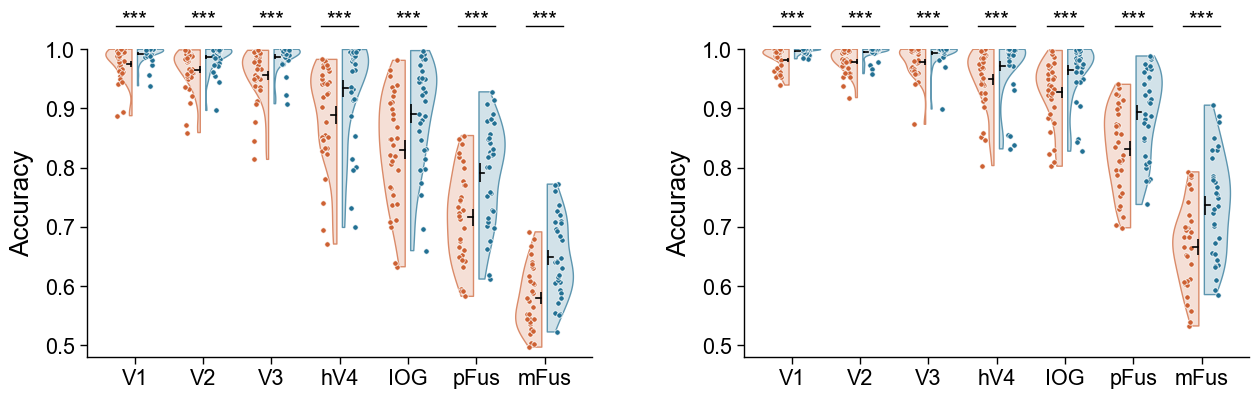

In [10]:
sfl_types = ['Original','Shuffled']
acc_ij_face_orig = np.load('../data/svmacc_shuffle_ori.npz',allow_pickle=True)['acc_ij_face']
acc_ij_face_sfld = np.load('../data/svmacc_shuffle_sfld.npz',allow_pickle=True)['acc_ij_face']
acc_d_subj = np.zeros((len(d),nsubj,len(roi_labels),len(sfl_types)))*np.nan # d x subj x roi x task
for dd in range(len(d)):
    acc_d_subj[dd,:,:,0] = np.nanmean(np.nanmean(acc_ij_face_orig[:,ds_list==d[dd],:,:],axis=1),axis=0)
    acc_d_subj[dd,:,:,1] = np.nanmean(np.nanmean(acc_ij_face_sfld[:,ds_list==d[dd],:,:],axis=1),axis=0)

# average accuracy for near/far distance [4x8]
nf = ['Near','Far'];num_nf=[[0,4],[5,9]]
acc_nf_subj = np.zeros([4*nsubj,len(roi_labels),len(sfl_types),len(nf)])*np.nan # 4*8samples x roi x task x nf
for sfl_i in range(len(sfl_types)):
    for roi_i in range(len(roi_labels)):
        for i in range(len(num_nf)):
            data = acc_d_subj[num_nf[i][0]:num_nf[i][1],:,roi_i,sfl_i]
            acc_nf_subj[:,roi_i,sfl_i,i] = data.reshape([data.shape[0]*data.shape[1]])

cm = ['#cd6133','#227093']

# plot
ylims = [[0.48,1,0.2],[0.48,1,0.2]]
set_figure()
fig,axes = plt.subplots(1,2,figsize=(15,4),gridspec_kw={'wspace': 0.3})
for i in range(2): #near far
    # test
    ps0,sts = pair_test(acc_nf_subj[:,:,:,i],method='wilcoxon',correction='none')
    ps,sts = pair_test(acc_nf_subj[:,:,:,i],method='wilcoxon',correction='bonferroni')
    print('p( without correction):{}'.format([round(p,4) for p in ps0]))
    print('p(correction):{}'.format([round(p,4) for p in ps]))    
    ax = axes[i]
    set_ax(ax)
    myviolinplot_pair(ax,acc_nf_subj[:,:,:,i],'mean','sem',ps,[1.05,1.04],cm)
    ax.set_ylabel('Accuracy',labelpad=8)
    ax.set_xticklabels(roi_labels)
    #ax.set_yticks(np.arange(ylims[i][0],ylims[i][1]*1.01,ylims[i][2]))
    ax.set_yticks([0.5,0.6,0.7,0.8,0.9,1])
    ax.set_xlim([0.3,7.7])
    ax.set_ylim(ylims[i][:2])
fig.savefig('figS9-svm.pdf', bbox_inches='tight')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_52708\1297242200.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('figS9-svm-legend.pdf')
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


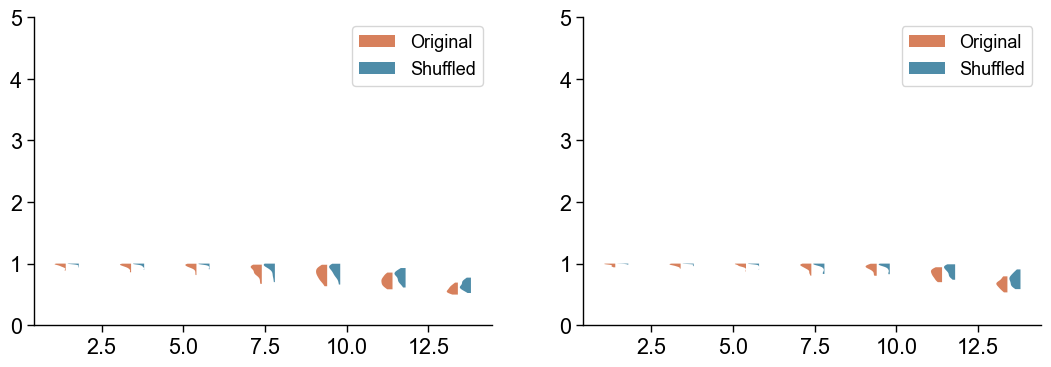

In [16]:
fig,axes = plt.subplots(1,2,figsize=(13,4),gridspec_kw={'wspace': 0.2})
alpha0=0.6
ngroup=len(sfl_types);xgap = 2; nxl = len(roi_labels); w = 0.8/ngroup*xgap
x = np.linspace(xgap,xgap*nxl,nxl)
ylims = [[-1.5,1.5],[-0.6,2.6]]
ytks = [[-1,0,1],[-1,0,1,2]]
pys = [[0.12,0.07],[0.12,0.08]]
parts = []
roi_i=0
for nf_i in range(len(nf)):
    data_m = np.zeros([len(roi_labels),ngroup])
    data_e = np.zeros([2,len(roi_labels),ngroup])
    data = acc_nf_subj[:,:,:,nf_i]
    for ng in range(ngroup):
        [data_m[:,ng],data_e[:,:,ng],bsample] = stat_m_e(data[:,:,ng],mtype='mean',etype='sem')
        vp1 = axes[nf_i].violinplot(data[:,:,ng], positions = x-0.6+ng*0.4, vert = True, widths = w*0.85, 
                        points = 100, bw_method = 'scott', side = 'low', 
                    showmeans = False, showextrema = False, showmedians = False, quantiles = None)
        for b1 in vp1['bodies']:
            b1.set_facecolor(cm[ng])
            b1.set_alpha(0.8)
        parts.append(b1)
    axes[nf_i].legend(parts,sfl_types)
    axes[nf_i].set_ylim([0,5])
fig.savefig('figS9-svm-legend.pdf')